### Train model

### Prepare train and valid data

In [9]:
import sys  
sys.path.insert(0, '../')

from scripts.data_generator import make_audio_gen


TRAIN_CORPUS = "../data_st/train_corpus.json"
VALID_CORPUS = "../data_st/valid_corpus.json"
MFCC_DIM = 13
SPECTOGRAM = False
EPOCHS = 10 # changed epoch from 2 to 10
MODEL_NAME = "model_2"
MINI_BATCH_SIZE = 35 #chamged size from 250 to 35
SORT_BY_DURATION=False
MAX_DURATION = 10.0

audio_gen = make_audio_gen(TRAIN_CORPUS, VALID_CORPUS, spectrogram=False, mfcc_dim=MFCC_DIM,
                           minibatch_size=MINI_BATCH_SIZE, sort_by_duration=SORT_BY_DURATION,
                           max_duration=MAX_DURATION)
# add the training data to the generator
audio_gen.load_train_data()
audio_gen.load_validation_data()

### Run training

In [2]:
import mlflow 
from scripts.train import train
from scripts.models import model_1
from scripts.char_map import char_map, index_map
EPOCHS = 20
MODEL_NAME = "model_1"
model = model_1(input_dim=13,
                filters=200,
                kernel_size=11, 
                conv_stride=2,
                conv_border_mode='valid',
                units=250,
                activation='relu',
                dropout_rate=0.5,
                number_of_layers=5,
                output_dim=len(char_map)+1)
                
train(audio_gen, input_to_softmax=model, model_name=MODEL_NAME, epochs=EPOCHS, minibatch_size=MINI_BATCH_SIZE)

2021/08/09 16:02:40 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of keras. If you encounter errors during autologging, try upgrading / downgrading keras to a supported version, or try upgrading MLflow.
/home/nebiyu_sugamo/anaconda2/envs/speech/lib/python3.6/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 13)]        0         
_________________________________________________________________
layer_1_conv (Conv1D)        (None, None, 200)         28800     
_________________________________________________________________
conv_batch_norm (BatchNormal (None, None, 200)         800       
_________________________________________________________________
rnn_1 (GRU)                  (None, None, 250)         339000    
_________________________________________________________________
bt_rnn_1 (BatchNormalization (None, None, 250)         1000      
_________________________________________________________________
rnn_2 (GRU)                  (None, None, 250)         376500    
_________________________________________________________________
bt_rnn_2 (BatchNormalization (None, None, 250)         1000  

/home/nebiyu_sugamo/anaconda2/envs/speech/lib/python3.6/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021/08/09 16:02:41 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'aac96d43a404490da09c78240be41934', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current keras workflow


Epoch 1/20
50/50 [==============================] - 152s 2s/step - loss: 226.8102 - val_loss: 152.1749
Epoch 2/20
50/50 [==============================] - 102s 2s/step - loss: 131.7460 - val_loss: 140.8991
Epoch 3/20
50/50 [==============================] - 102s 2s/step - loss: 109.9974 - val_loss: 119.6109
Epoch 4/20
50/50 [==============================] - 102s 2s/step - loss: 104.6727 - val_loss: 107.9589
Epoch 5/20
50/50 [==============================] - 103s 2s/step - loss: 100.5934 - val_loss: 102.0113
Epoch 6/20
50/50 [==============================] - 101s 2s/step - loss: 94.8151 - val_loss: 94.9694
Epoch 7/20
50/50 [==============================] - 103s 2s/step - loss: 91.6851 - val_loss: 91.2940
Epoch 8/20
50/50 [==============================] - 103s 2s/step - loss: 89.3117 - val_loss: 90.1911
Epoch 9/20
50/50 [==============================] - 101s 2s/step - loss: 88.5649 - val_loss: 87.1556
Epoch 10/20
50/50 [==============================] - 102s 2s/step - loss: 85.4983

2021/08/09 16:37:45 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/nebiyu_sugamo/anaconda2/envs/speech/lib/python3.6/site-packages/mlflow/keras.py:680: UserWarning: Logging to MLflow failed: Unable to infer keras module from the model, please specify which keras module ('keras' or 'tensorflow.keras') is to be used to save and load the model."


### Load saved model

In [3]:
from scripts.char_map import char_map, index_map
from scripts.models import model_1

model = model_1(input_dim=13,
                filters=200,
                kernel_size=11, 
                conv_stride=2,
                conv_border_mode='valid',
                units=250,
                activation='relu',
                dropout_rate=0.5,
                number_of_layers=5,
                output_dim=len(char_map)+1)
model_name = "model_1"
model.load_weights('../models/' + model_name + '.h5')

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, None, 13)]        0         
_________________________________________________________________
layer_1_conv (Conv1D)        (None, None, 200)         28800     
_________________________________________________________________
conv_batch_norm (BatchNormal (None, None, 200)         800       
_________________________________________________________________
rnn_1 (GRU)                  (None, None, 250)         339000    
_________________________________________________________________
bt_rnn_1 (BatchNormalization (None, None, 250)         1000      
_________________________________________________________________
rnn_2 (GRU)                  (None, None, 250)         376500    
_________________________________________________________________
bt_rnn_2 (BatchNormalization (None, None, 250)         1000

### Loss

2021/08/09 16:51:21 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of keras. If you encounter errors during autologging, try upgrading / downgrading keras to a supported version, or try upgrading MLflow.


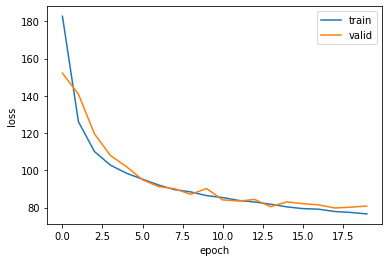

In [11]:
from scripts.plot import plot_hist
%matplotlib inline
model_name = "model_1"
plot_hist(model_name)